Capstone Analytic Report

Thinkful Data Science Prep Course Capstone

Author: Keith Laskay, klaskay@gmail.com

Date: 3-22-18

In [1]:
# loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

/home/keithlaskay/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/keithlaskay/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# New York City - Payroll Data
New York City is the most populous city in the United States of America and is often thought of as one of leading cultural, financial, and entertainment centers of the world. New York City has an estimated population of over 8 million people divided into five boroughs. The larger metropolitan area covers an estimated 20 million people which include parts of New Jersey and Connecticut. 

New York City is home to major Financial Markets including the New York Stock Exchange (NYSE) and NASDAQ. Many Fortune 500 companies have satellite offices or headquarters within the city limits. New York City is home to many forms of entertainment, including professional sports, television,  and theater. The city remains one of the largest retail centers in the world with many fashion brands having locations in the garment district. New York City is a cultural melting pot, making it one of the most diverse cities in the world, some even having their own geographic regions such as Little Italy, Spanish Harlem or Chinatown. Famous landmarks in the city include Central Park, 1 World Trade Center, United Nations, Empire State Building and Chrysler Building. Having so many people live, work, and visit the city requires a huge amount of employees to provide the services to keep the city operational. 

This report looks to explore the trends in labor as displayed in the dataset published by the City of New York. 

   

## Analytic Questions
-  In what location do most of the city employees work?

-  What are the average earnings of full-time city employees?

-  How much is the wage affected by the agency the employee works for?

-  How much have the wages increased over the years of the data?

-  Are there employees who are abusing Overtime?

### Notes about the Data
-  NYC Fiscal Year runs from July to the following June 
-  The Dataset includes many temporary employees
-  Dataset used - https://www.kaggle.com/new-york-city/nyc-citywide-payroll-data/data

## Loading the Data and looking at its contents

In [2]:
nyc = pd.read_csv('./data/Citywide_Payroll_Data__Fiscal_Year_.csv', low_memory=False)

In [3]:
nyc.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,1830.00,$47166.03,2.25,$57.28,$0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,1831.00,$119042.50,0.00,$0.00,$0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,1181.68,$27452.62,1.00,$21.34,$33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,1831.00,$115104.57,0.00,$0.00,$0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00


In [4]:
nyc.shape # Length and width of data

(2194488, 16)

In [5]:
nyc.info() # Types of data being used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 16 columns):
Fiscal Year                   int64
Agency Name                   object
Last Name                     object
First Name                    object
Mid Init                      object
Agency Start Date             object
Work Location Borough         object
Title Description             object
Leave Status as of June 30    object
Base Salary                   object
Pay Basis                     object
Regular Hours                 float64
Regular Gross Paid            object
OT Hours                      float64
Total OT Paid                 object
Total Other Pay               object
dtypes: float64(2), int64(1), object(13)
memory usage: 267.9+ MB


In [6]:
#fill in spaces in column names with underscores
cols = nyc.columns
cols = cols.str.replace(' ','_')
nyc.columns = list(cols)

In [7]:
# Convert fiscal columns from strings to floats be removing the $, then convert. the dtype
nyc['Base_Salary'] = nyc['Base_Salary'].str.replace('$','')
nyc['Base_Salary'] = nyc['Base_Salary'].astype(float)

nyc['Regular_Gross_Paid'] = nyc['Regular_Gross_Paid'].str.replace('$','')
nyc['Regular_Gross_Paid'] = nyc['Regular_Gross_Paid'].astype(float)

nyc['Total_OT_Paid'] = nyc['Total_OT_Paid'].str.replace('$','')
nyc['Total_OT_Paid'] = nyc['Total_OT_Paid'].astype(float)

nyc['Total_Other_Pay'] = nyc['Total_Other_Pay'].str.replace('$','')
nyc['Total_Other_Pay'] = nyc['Total_Other_Pay'].astype(float)

In [8]:
# Checking for Null or missing data 
nyc.isnull().sum()

Fiscal_Year                        0
Agency_Name                        0
Last_Name                        942
First_Name                       952
Mid_Init                      890008
Agency_Start_Date                  0
Work_Location_Borough         506214
Title_Description                 21
Leave_Status_as_of_June_30         0
Base_Salary                        0
Pay_Basis                          0
Regular_Hours                      0
Regular_Gross_Paid                 0
OT_Hours                           0
Total_OT_Paid                      0
Total_Other_Pay                    0
dtype: int64

In [9]:
# Calc descriptive stats for features
nyc.describe()

,Fiscal_Year,Base_Salary,Regular_Hours,Regular_Gross_Paid,OT_Hours,Total_OT_Paid,Total_Other_Pay
count,2194488.00,2194488.00,2194488.00,2194488.00,2194488.00,2194488.00,2194488.00
mean,2015.53,41100.11,666.04,40190.08,59.17,3225.30,2089.83
std,1.11,39544.75,887.61,37305.55,147.92,8825.56,4936.87
min,2014.00,0.50,-730.43,-29862.19,-27.00,-23826.85,-281595.04
25%,2015.00,33.18,0.00,3560.95,0.00,0.00,0.00
50%,2016.00,39523.00,0.00,34715.85,0.00,0.00,0.00
75%,2017.00,76275.00,1825.00,71189.35,1.00,178.74,1179.08
max,2017.00,350000.00,4171.43,672308.86,3347.50,228633.82,100355.84


In [10]:
# initial eval of work locations, many duplicates because of case
nyc['Work_Location_Borough'].value_counts()

MANHATTAN        1139126
QUEENS            176557
BROOKLYN          152656
BRONX              83614
OTHER              48268
MANHATTAN          30267
RICHMOND           20986
BROOKLYN           12166
QUEENS              9215
BRONX               6616
RICHMOND            1710
WESTCHESTER         1641
Manhattan           1622
Bronx                935
ULSTER               934
Queens               660
SULLIVAN             420
DELAWARE             286
PUTNAM               119
NASSAU               114
Richmond             112
SCHOHARIE             84
DUTCHESS              56
ALBANY                45
GREENE                29
WASHINGTON DC         20
ORANGE                16
Name: Work_Location_Borough, dtype: int64

In [11]:
# eval pay basis, note bad formatting causes cotegories not te be combined
nyc['Pay_Basis'].value_counts()

 per Annum          1198132
 per Day             463987
 per Hour            405923
per Annum            109032
 Prorated Annual      10853
per Hour               5501
per Day                1048
Prorated Annual          12
Name: Pay_Basis, dtype: int64

In [12]:
# Clean the work location, and pay basis to avoid grouping calc errors
nyc['Work_Location_Borough'] = nyc['Work_Location_Borough'].str.strip().str.title()
nyc['Pay_Basis'] = nyc['Pay_Basis'].str.strip().str.title()

In [13]:
# Cleaned work location
nyc['Work_Location_Borough'].value_counts()

Manhattan        1171015
Queens            186432
Brooklyn          164822
Bronx              91165
Other              48268
Richmond           22808
Westchester         1641
Ulster               934
Sullivan             420
Delaware             286
Putnam               119
Nassau               114
Schoharie             84
Dutchess              56
Albany                45
Greene                29
Washington Dc         20
Orange                16
Name: Work_Location_Borough, dtype: int64

In [14]:
# cleaned Pay Basis
nyc['Pay_Basis'].value_counts()

Per Annum          1307164
Per Day             465035
Per Hour            411424
Prorated Annual      10865
Name: Pay_Basis, dtype: int64

In [15]:
nyc['Agency_Name'].value_counts()

DEPT OF ED PEDAGOGICAL            423338
DEPT OF ED PER SESSION TEACHER    320701
BOARD OF ELECTION POLL WORKERS    134300
POLICE DEPARTMENT                 127674
DEPT OF ED PARA PROFESSIONALS     126809
DEPT OF ED HRLY SUPPORT STAFF      97102
FIRE DEPARTMENT                    72556
DEPT OF PARKS & RECREATION         70643
HRA/DEPT OF SOCIAL SERVICES        61045
DEPARTMENT OF EDUCATION ADMIN      60674
POLICE DEPARTMENT                  59974
DEPARTMENT OF SANITATION           56199
Police Department                  55619
NYC HOUSING AUTHORITY              55182
DEPT OF ED PER DIEM TEACHERS       55172
DEPARTMENT OF CORRECTION           50918
DEPT OF HEALTH/MENTAL HYGIENE      29072
ADMIN FOR CHILDREN'S SVCS          28576
DEPT OF ENVIRONMENT PROTECTION     26742
COMMUNITY COLLEGE (MANHATTAN)      23623
DEPARTMENT OF TRANSPORTATION       23187
COMMUNITY COLLEGE (KINGSBORO)      20020
COMMUNITY COLLEGE (LAGUARDIA)      18923
COMMUNITY COLLEGE (QUEENSBORO)     15434
COMMUNITY COLLEG

In [16]:
# Clean the Agency Data 
nyc['Agency_Name'] = nyc['Agency_Name'].str.strip()
nyc['Agency_Name'] = nyc['Agency_Name'].str.replace('.', '')
nyc['Agency_Name'] = nyc['Agency_Name'].str.replace("'", '')

nyc['Agency_Name'] = nyc['Agency_Name'].replace({'DEPT': 'DEPARTMENT'},regex=True)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'BOARD OF CORRECTIONS' if 'correction' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'BOROUGH PRESIDENT' if 'borough president' in name.lower() else name)
nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'BOROUGH PRESIDENT' if 'president borough' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'COMMUNITY BOARD' if 'community bd' in name.lower() else name)
nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'COMMUNITY BOARD' if 'community board' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'COMMUNITY COLLEGE' if 'community college' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'DEPARTMENT OF EDUCATION' if 'dept of ed' in name.lower() else name)
nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'DEPARTMENT OF EDUCATION' if 'doe' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'DISTRICT ATTORNEY' if 'da' in name.lower() else name)
nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'DISTRICT ATTORNEY' if 'district attorney' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'POLICE DEPARTMENT' if 'police department' in name.lower() else name)

nyc['Agency_Name'] = nyc['Agency_Name'].apply(lambda name: 'PUBLIC ADMINISTRATOR' if 'public administrator' in name.lower() else name)

In [17]:
nyc['Agency_Name'].value_counts()

DISTRICT ATTORNEY                       444451
DEPARTMENT OF ED PER SESSION TEACHER    320701
POLICE DEPARTMENT                       243267
BOARD OF ELECTION POLL WORKERS          134300
DEPARTMENT OF ED PARA PROFESSIONALS     126809
COMMUNITY COLLEGE                       102387
DEPARTMENT OF ED HRLY SUPPORT STAFF      97102
FIRE DEPARTMENT                          72556
DEPARTMENT OF PARKS & RECREATION         70643
HRA/DEPARTMENT OF SOCIAL SERVICES        61045
DEPARTMENT OF EDUCATION ADMIN            60674
DEPARTMENT OF SANITATION                 56199
NYC HOUSING AUTHORITY                    55182
DEPARTMENT OF ED PER DIEM TEACHERS       55172
BOARD OF CORRECTIONS                     51001
DEPARTMENT OF HEALTH/MENTAL HYGIENE      29072
ADMIN FOR CHILDRENS SVCS                 28576
DEPARTMENT OF ENVIRONMENT PROTECTION     26742
DEPARTMENT OF TRANSPORTATION             23187
DEPARTMENT OF HOMELESS SERVICES          10695
DEPARTMENT OF CITYWIDE ADMIN SVCS        10060
HOUSING PRESE

By cleaning the data went from 165 different agencies to 77

In [18]:
# Employee status at the end of 2017 Fiscal Year
nyc[nyc['Fiscal_Year']==2017]['Leave_Status_as_of_June_30'].value_counts()

ACTIVE                 494029
CEASED                  55830
ON LEAVE                 5924
SEASONAL                 5598
ON SEPARATION LEAVE       885
Name: Leave_Status_as_of_June_30, dtype: int64

In [19]:
# Employee Pay Basis as of end of 2017 Fiscal Year
nyc[nyc['Fiscal_Year']==2017]['Pay_Basis'].value_counts()

Per Annum          334939
Per Day            113913
Per Hour           111126
Prorated Annual      2288
Name: Pay_Basis, dtype: int64

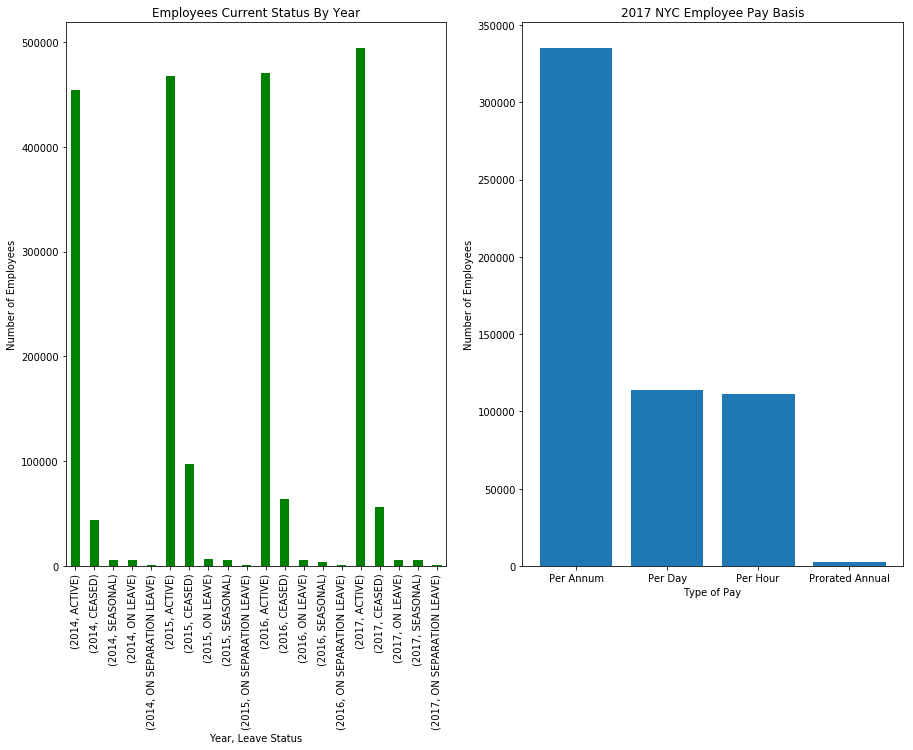

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
nyc.groupby('Fiscal_Year')['Leave_Status_as_of_June_30'].value_counts().plot(kind='bar', color='g')
plt.title('Employees Current Status By Year')
plt.ylabel('Number of Employees')
plt.xlabel('Year, Leave Status')

plt.subplot(1, 2, 2)
plt.bar(nyc['Pay_Basis'].value_counts().index, nyc[nyc['Fiscal_Year']==2017]['Pay_Basis'].value_counts())
plt.title('2017 NYC Employee Pay Basis')
plt.xlabel('Type of Pay')
plt.ylabel('Number of Employees')
plt.show();

In [21]:
nyc.groupby('Fiscal_Year')['Leave_Status_as_of_June_30'].value_counts()

Fiscal_Year  Leave_Status_as_of_June_30
2014         ACTIVE                        454121
             CEASED                         43638
             SEASONAL                        5397
             ON LEAVE                        5387
             ON SEPARATION LEAVE              982
2015         ACTIVE                        467773
             CEASED                         96958
             ON LEAVE                        6333
             SEASONAL                        5795
             ON SEPARATION LEAVE             1021
2016         ACTIVE                        469903
             CEASED                         64033
             ON LEAVE                        5959
             SEASONAL                        3967
             ON SEPARATION LEAVE              955
2017         ACTIVE                        494029
             CEASED                         55830
             ON LEAVE                        5924
             SEASONAL                        5598
          

Since a vast majority of the employees are of an active classification and are employed on a per annum basis that is where the rest of this analysis will focus.

## What is the average earnings of a full time employees, and how is it trending?

In [22]:
# make a new dataframe which is only active employees paid on a per annum basis
nyc_active = nyc[(nyc['Leave_Status_as_of_June_30'] == 'ACTIVE') & (nyc['Pay_Basis'] == 'Per Annum')].copy()

In [23]:
# check the dimensions
nyc_active.shape

(1126635, 16)

In [24]:
# check to make sure all years are still maintained
nyc_active['Fiscal_Year'].value_counts()

2017    294960
2016    285152
2015    276511
2014    270012
Name: Fiscal_Year, dtype: int64

In [25]:
# Sum of Salaries for active employees
nyc_active['Regular_Gross_Paid'].groupby(nyc_active['Fiscal_Year']).sum()

Fiscal_Year
2014   17112735928.79
2015   18156131961.05
2016   19060932616.57
2017   20571931064.61
Name: Regular_Gross_Paid, dtype: float64

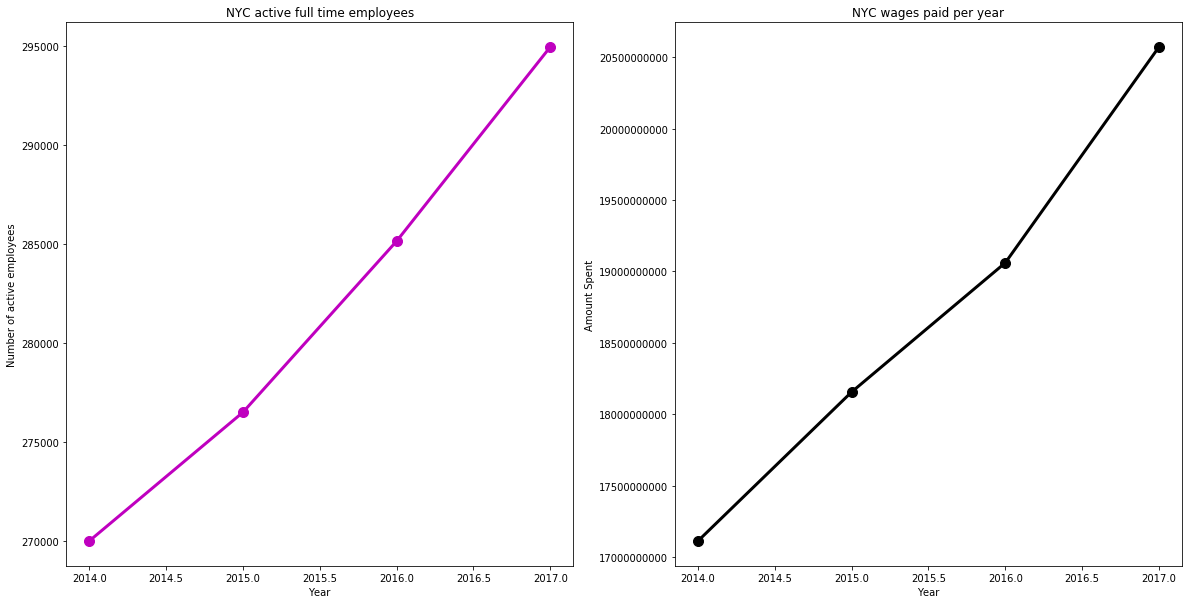

The average wage per year is for an employee is:
2014 : 63377.69
2015 : 65661.52
2016 : 66844.81
2017 : 69744.82


In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(nyc_active['Fiscal_Year'].value_counts().sort_index(), marker='o', color='m', linewidth=3, ms=10)
plt.title('NYC active full time employees')
plt.ylabel('Number of active employees')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
plt.plot(nyc_active['Regular_Gross_Paid'].groupby(nyc_active['Fiscal_Year']).sum(),
         marker='o', color='k', linewidth=3, ms=10,)
plt.title('NYC wages paid per year')
plt.ylabel('Amount Spent')
plt.xlabel('Year')
plt.ticklabel_format(style='plain')
plt.show();

ave = nyc_active['Regular_Gross_Paid'].groupby(nyc_active['Fiscal_Year']).mean()
print('The average wage per year is for an employee is:')
years = list(ave.index)
averages = list(ave.values)
for i in range(len(years)):
    print('{} : {}'.format(years[i], averages[i].round(2)))

The average employee's wage is rising over the period while the city is also adding more employees every year. The city should look to plan carefully to make sure that their hiring corresponds with tax revenue and long term forcasts.

### In what location do most of the city employees work?

In [27]:
nyc_active['Work_Location_Borough'].isnull().value_counts()
#almost all of theses are in 2014

False    859350
True     267285
Name: Work_Location_Borough, dtype: int64

In [28]:
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Richmond', np.NaN]

In [29]:
nyc_active['Updated_Location'] = nyc_active['Work_Location_Borough'].apply(lambda x: x if x in boroughs else 'Other')

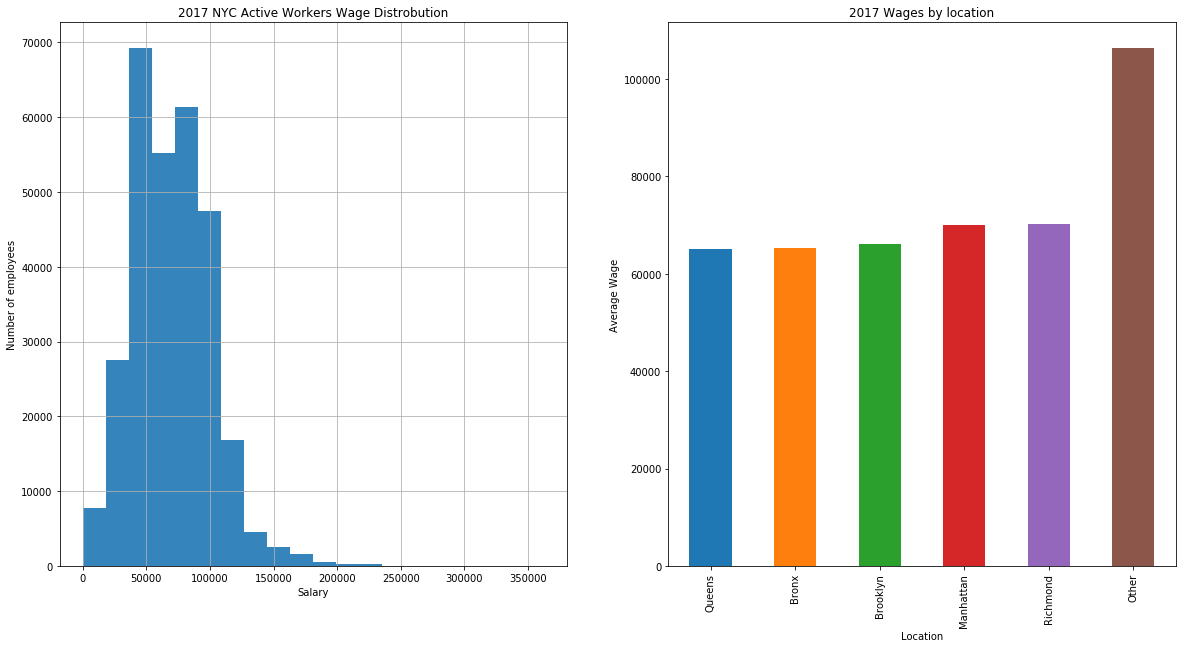

The employees who did not show a work location had the highest average wage, but this could have been skewed by the amount of data there were 9730 who were listed as others while the mean of the other locations was 57046.0


In [30]:
#Graph 1 Hist of 2017 wage distrobution
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(nyc_active[nyc_active['Fiscal_Year']==2017]['Regular_Gross_Paid'], bins=20, alpha=.9)
plt.title('2017 NYC Active Workers Wage Distrobution')
plt.ylabel('Number of employees')
plt.xlabel('Salary')
plt.grid()

#Graph 2 Wages by work location for 2017
plt.subplot(1, 2, 2)
nyc_active[nyc_active['Fiscal_Year']==2017].groupby('Updated_Location')['Regular_Gross_Paid'].mean().sort_values().plot(kind='bar')
plt.title('2017 Wages by location')
plt.xlabel('Location')
plt.ylabel('Average Wage')
plt.show();

to_inves = len(nyc_active[(nyc_active['Fiscal_Year']==2017) & (nyc_active['Updated_Location']=='Other')])
not_inves = len(nyc_active[(nyc_active['Fiscal_Year']==2017) & (nyc_active['Updated_Location']!='Other')])

print('The employees who did not show a work location had the highest average wage, \
but this could have been skewed by the amount of data there were {} who were listed as \
others while the mean of the other locations was {}'.format(str(to_inves), str(not_inves/5)))

In [31]:
# Work location for of 2017 condensed
nyc_active[nyc_active['Fiscal_Year']==2017]['Updated_Location'].value_counts()

Manhattan    178015
Queens        43579
Brooklyn      37825
Bronx         20309
Other          9730
Richmond       5499
Name: Updated_Location, dtype: int64

In [32]:
nyc_active_2014 = nyc_active[nyc_active['Fiscal_Year']==2014]

In [33]:
# Many missing and Null values for 2017
nyc_active_2014['Updated_Location'].value_counts()

Manhattan    1231
Bronx         808
Queens        601
Richmond       98
Name: Updated_Location, dtype: int64

In [34]:
# null == True, False == location was recorded
nyc_active_2014['Updated_Location'].isnull().value_counts()

True     267274
False      2738
Name: Updated_Location, dtype: int64

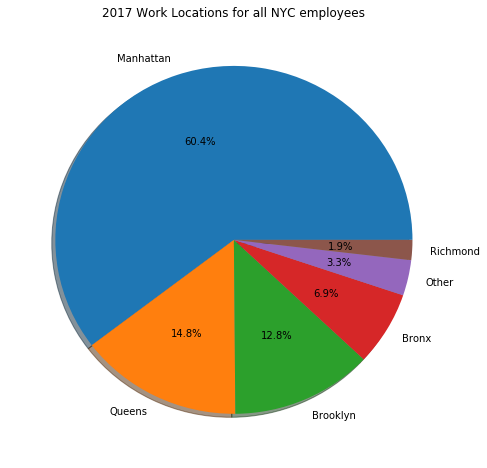

In [35]:
plt.figure(figsize=(8, 8))
label = nyc_active[nyc_active['Fiscal_Year']==2017]['Updated_Location'].value_counts().index
plt.pie(nyc_active[nyc_active['Fiscal_Year']==2017]['Updated_Location'].value_counts(), labels=label, autopct='%1.1f%%', shadow=True)
plt.title('2017 Work Locations for all NYC employees', loc='center')
plt.show();

The above pie chart shows that most of the city employess work in Mahattan which is not surprising given that that is where many of the headquarters are including City Hall and other administrative offices. The chart focuses solely on 2017, as 2014 had almost ten times as many null values as completed data for the year.

## How much is the wage effected by the agency the employee works for?

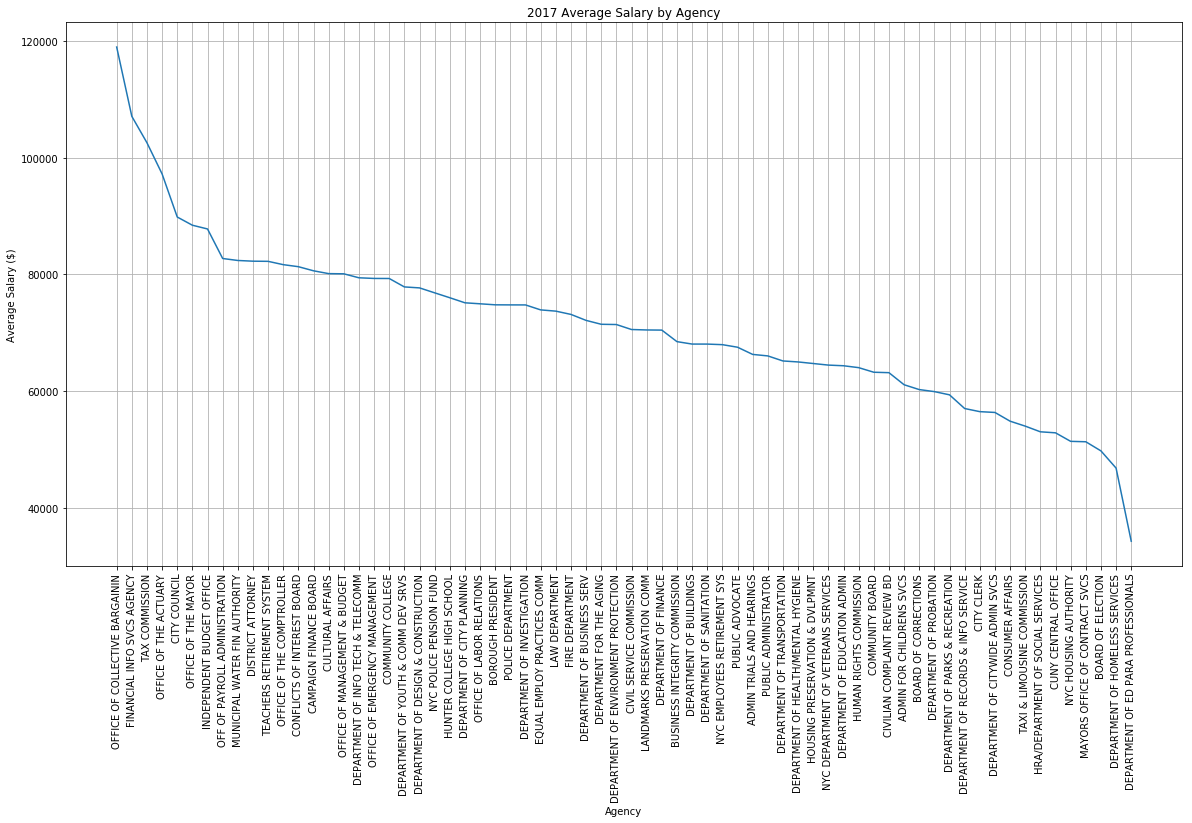

In [36]:
plt.figure(figsize=(20,10))
avg = nyc_active[nyc_active['Fiscal_Year']==2017].groupby('Agency_Name')['Regular_Gross_Paid'].mean().sort_values(ascending=False)
plt.plot(avg.index,avg.values)
plt.xlabel('Agency')
plt.ylabel('Average Salary ($)')
plt.title('2017 Average Salary by Agency')
plt.xticks(rotation=90)
plt.grid()
plt.show();

In [37]:
agency_avg = nyc_active[nyc_active['Fiscal_Year']==2017].groupby('Agency_Name')['Regular_Gross_Paid'].mean().sort_values(ascending=False).head(10)

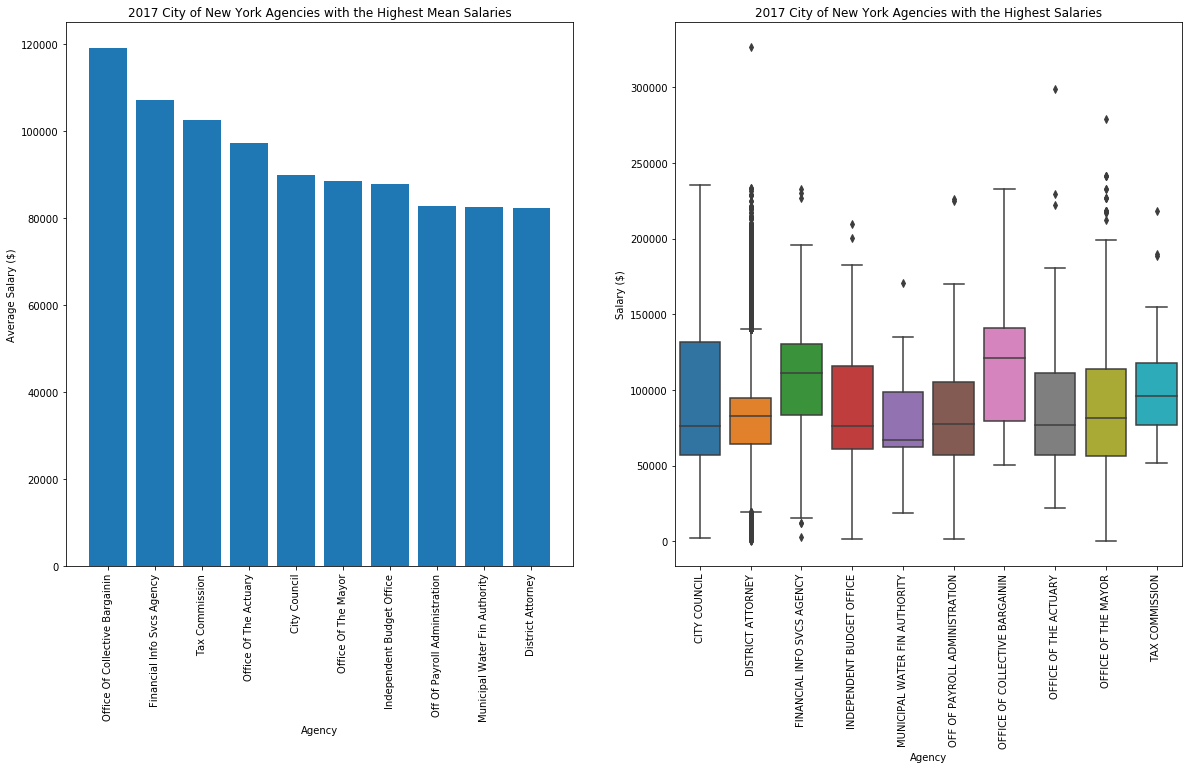

In [38]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.bar(agency_avg.index.str.title(), agency_avg.values)
plt.xticks(rotation=90, verticalalignment='top')
plt.title('2017 City of New York Agencies with the Highest Mean Salaries')
plt.xlabel('Agency',)
plt.ylabel('Average Salary ($)')

highest_paying = list(agency_avg.index)
high_pay_data = nyc_active[(nyc_active['Agency_Name'].isin(highest_paying)) & (nyc_active['Fiscal_Year']==2017)]

plt.subplot(1, 2, 2)
sns.boxplot(x='Agency_Name', y='Regular_Gross_Paid',data=high_pay_data)
plt.xticks(rotation=90)
plt.title('2017 City of New York Agencies with the Highest Salaries')
plt.xlabel('Agency')
plt.ylabel('Salary ($)')
plt.show();


## How much have the wages increased over the years of the data?

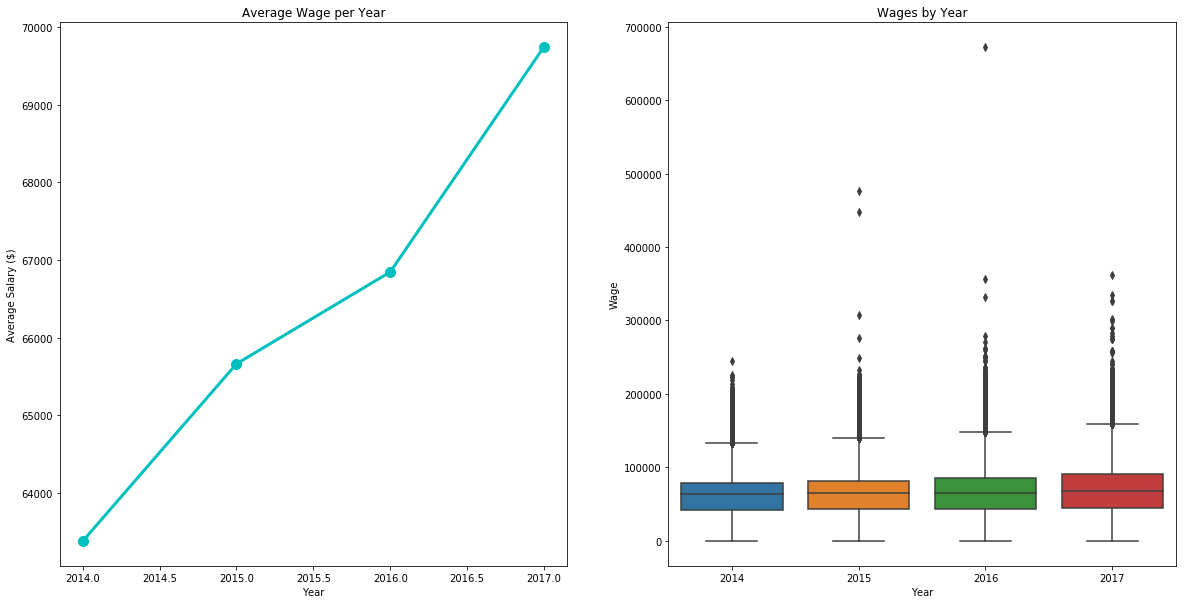

The average wage per year is:
2014 : 63377.69
2015 : 65661.52
2016 : 66844.81
2017 : 69744.82


In [39]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(nyc_active.groupby('Fiscal_Year')['Regular_Gross_Paid'].mean().index,
        nyc_active.groupby('Fiscal_Year')['Regular_Gross_Paid'].mean(),marker='o', color='c', linewidth=3, ms=10)
plt.title('Average Wage per Year')
plt.xlabel('Year')
plt.ylabel('Average Salary ($)')

plt.subplot(1, 2, 2)
sns.boxplot(x=nyc_active['Fiscal_Year'], y=nyc_active['Regular_Gross_Paid'], data=nyc_active)
plt.title('Wages by Year')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.show();

ave = nyc_active['Regular_Gross_Paid'].groupby(nyc_active['Fiscal_Year']).mean()
print('The average wage per year is:')
years = list(ave.index)
averages = list(ave.values)
for i in range(len(years)):
    print('{} : {}'.format(years[i], averages[i].round(2)));

## Is overtime pay being used wisely?

In [40]:
fy_2017 = nyc_active[nyc_active['Fiscal_Year']==2017].copy()
top_10_OT_agencies =list(fy_2017.groupby('Agency_Name')['Total_OT_Paid'].sum().sort_values(ascending=False)[:10].index)

In [41]:
fy_2017["Filter"] = fy_2017['Agency_Name'].apply(
    lambda agency: True if agency in top_10_OT_agencies else False)

In [42]:
fy_2017 = fy_2017[fy_2017['Filter']==True]
fy_2017['Agency_Name'].value_counts()

POLICE DEPARTMENT                       50096
FIRE DEPARTMENT                         16853
HRA/DEPARTMENT OF SOCIAL SERVICES       13082
BOARD OF CORRECTIONS                    12052
DEPARTMENT OF EDUCATION ADMIN           11040
DEPARTMENT OF SANITATION                 8883
NYC HOUSING AUTHORITY                    8084
ADMIN FOR CHILDRENS SVCS                 6212
DEPARTMENT OF ENVIRONMENT PROTECTION     4120
DEPARTMENT OF TRANSPORTATION             3550
Name: Agency_Name, dtype: int64

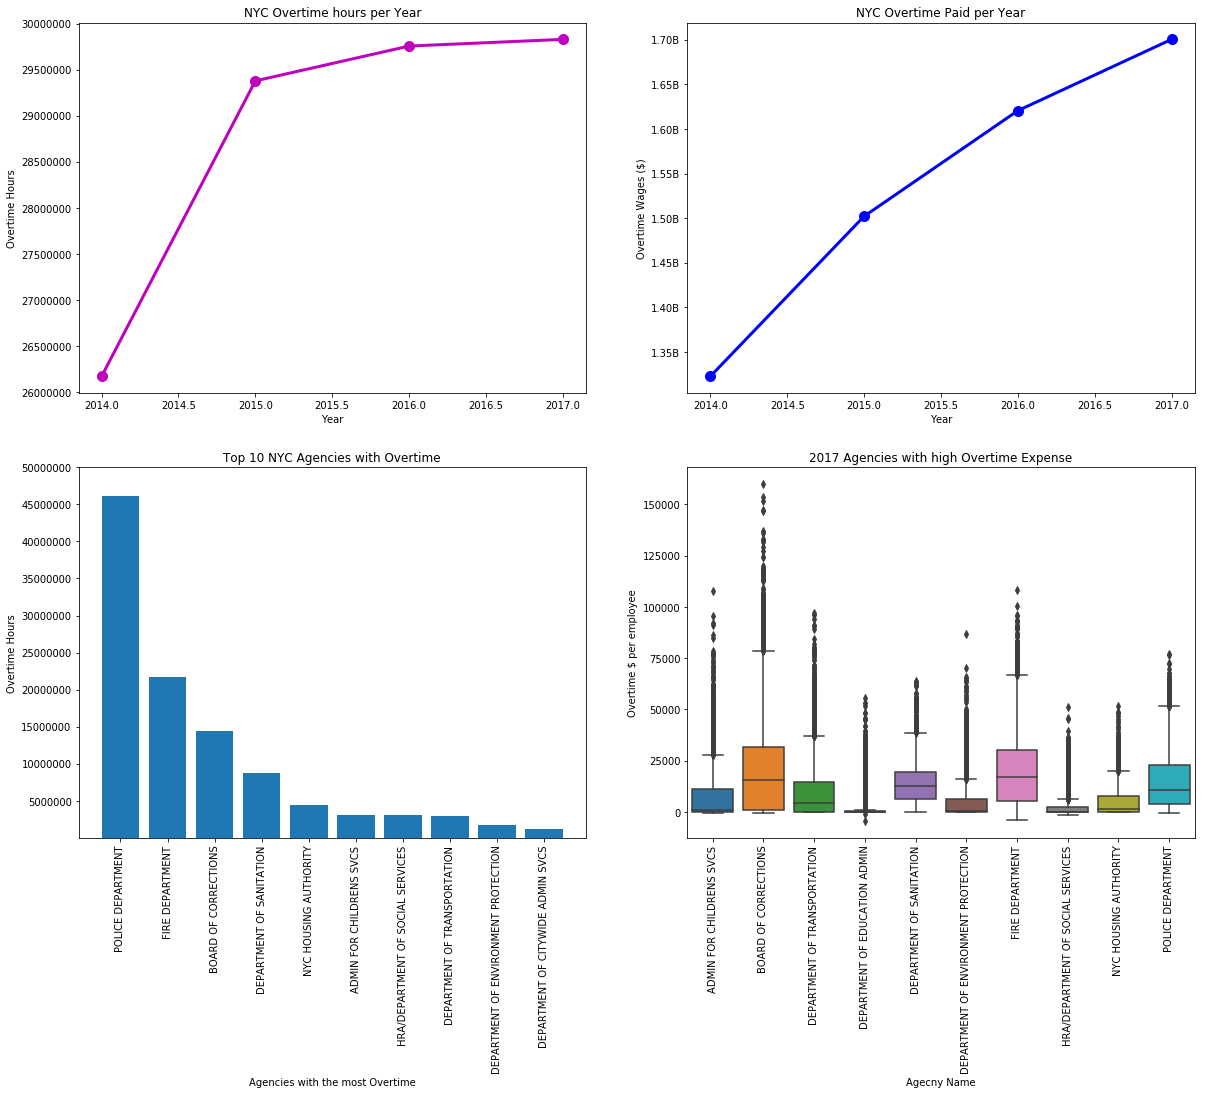

Agencies with employees who made more in overtime then base salary were: 

Board Of Corrections : 91 
Admin For Childrens Svcs : 39 
Department Of Transportation : 31 
Fire Department : 8 
Department Of Environment Protection : 2 
Police Department : 1 

Total employees who earned more in overtime then their base salary is deemed to be excessive, and there were 172 for the year 2017.


In [43]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(nyc_active.groupby('Fiscal_Year')['OT_Hours'].sum().index, 
         nyc_active.groupby('Fiscal_Year')['OT_Hours'].sum(), marker='o', color='m', linewidth=3, ms=10)
plt.xlabel('Year')
plt.ylabel('Overtime Hours')
plt.ticklabel_format(style='plain')
plt.title('NYC Overtime hours per Year')

plt.subplot(2, 2, 2)
plt.plot(nyc_active.groupby('Fiscal_Year')['Total_OT_Paid'].sum().index, 
         nyc_active.groupby('Fiscal_Year')['Total_OT_Paid'].sum(), marker='o', color='b', linewidth=3, ms=10)
plt.xlabel('Year')
plt.ylabel('Overtime Wages ($)')
ylab2_val = [1350000000, 1400000000, 1450000000, 1500000000, 1550000000, 1600000000, 1650000000, 1700000000]
ylab2_lab = ['1.35B', '1.40B','1.45B', '1.50B', '1.55B', '1.60B', '1.65B', '1.70B']
plt.yticks(ylab2_val, ylab2_lab)
plt.title('NYC Overtime Paid per Year'), 


plt.subplot(2, 2, 3)
plt.bar(nyc_active.groupby('Agency_Name')['OT_Hours'].sum().sort_values(ascending=False)[:10].index,
       nyc_active.groupby('Agency_Name')['OT_Hours'].sum().sort_values(ascending=False)[:10]);
plt.xticks(rotation=90)
plt.xlabel('Agencies with the most Overtime')
plt.ylabel('Overtime Hours')
ylab3_value = [5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000,]
ylab3_label = ['50M', '100M', '150M', '200M', '250M', '300M', '350M', '400M', '450M', '500M']
plt.yticks(ylab3_value, ylab3_value)
plt.title('Top 10 NYC Agencies with Overtime')

plt.subplot(2, 2, 4)
sns.boxplot(x=fy_2017['Agency_Name'],y=fy_2017['Total_OT_Paid'])
plt.xticks(rotation=90)
plt.xlabel('Agecny Name')
plt.ylabel('Overtime $ per employee')
plt.title('2017 Agencies with high Overtime Expense')

plt.show();

ot_over_sal = fy_2017[fy_2017['Total_OT_Paid'] >= fy_2017['Base_Salary']]['Agency_Name'].value_counts()
print('Agencies with employees who made more in overtime then base salary were: \n')
dept = list(ot_over_sal.index)
cnt = list(ot_over_sal.values)
high_ot = ot_over_sal.sum()
year = nyc_active['Fiscal_Year'].value_counts().index[0]

emp_2017_idx = nyc_active['Fiscal_Year'].value_counts().index
for i in range(len(dept)):
    print('{} : {} '.format(dept[i].title(), cnt[i]))
print('\nTotal employees who earned more in overtime then their base salary is deemed to be excessive, and there \
were {} for the year {}.'.format(high_ot, year))


## Further Research

Overall the dataset is fairly complete, for some of the years, there are exceptions where there is missing data, such as work location in 2014. Comparing the present year to prior years the city appears to be doing a good job in keeping the wage expense under control. There may be other factors which is which should be researched to make sure that tax payer money is being spent in the best possible way, such as is some of the overtime expense due to Labor Union Contracts. Looking at the 10 agencies which have high overtime, most are ones which provide services constantly around the clock, such as police and fire.

A comparison of the city to its priors is fine for basic benchmarking, however, further analysis should be done to compare the city to others of comparable size both domestically and internationally. Besides wages, other indicators should be used to measure performance such as population growth and GDP. 

## Resources

-  https://www.kaggle.com/new-york-city/nyc-citywide-payroll-data

-  https://en.wikipedia.org/wiki/New_York_City

-  https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e